In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AIML Dataset.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()
df.describe()
df_null = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df_null

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

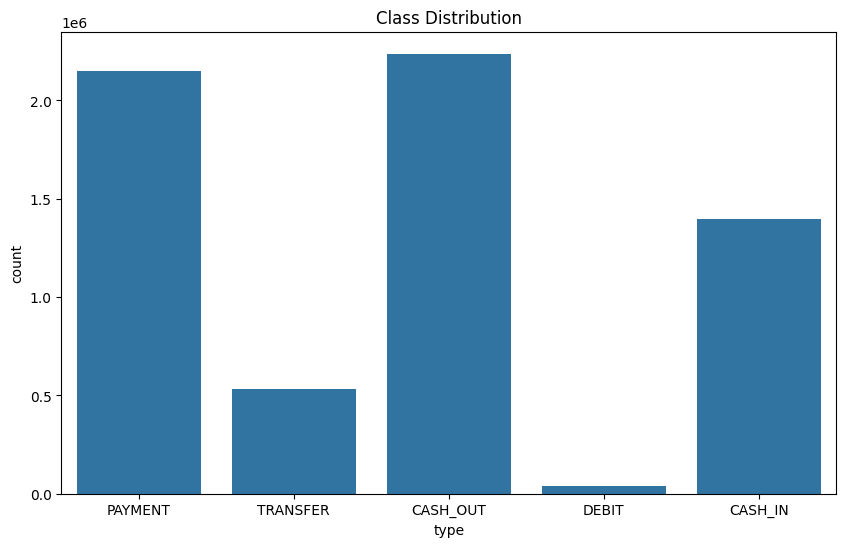

In [11]:
# Analyzing the dataset
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.show()

In [15]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
type_vs_fraud=df.groupby("type")["isFraud"].mean()
(type_vs_fraud.sort_values(ascending=False))

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

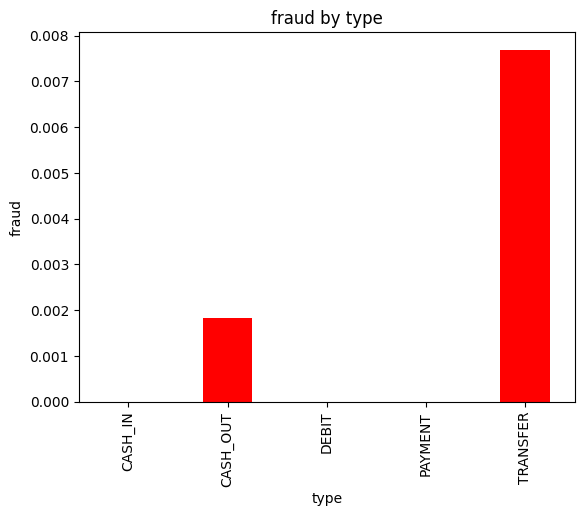

In [18]:
type_vs_fraud.plot(kind='bar',color='red',title='fraud by type')
plt.ylabel("fraud")
plt.xlabel("type")
plt.show()

In [ ]:
df.shape[0]

6362620

#percentage of fraud

In [6]:
round(df["isFraud"].value_counts()[1]/df.shape[0]*100,2)

np.float64(0.13)

In [18]:
corr=df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)
corr

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [12]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [33]:
diff_btw_balances_org = df['oldbalanceOrg'] - df['newbalanceOrig']
diff_btw_balances_org

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Length: 6362620, dtype: float64

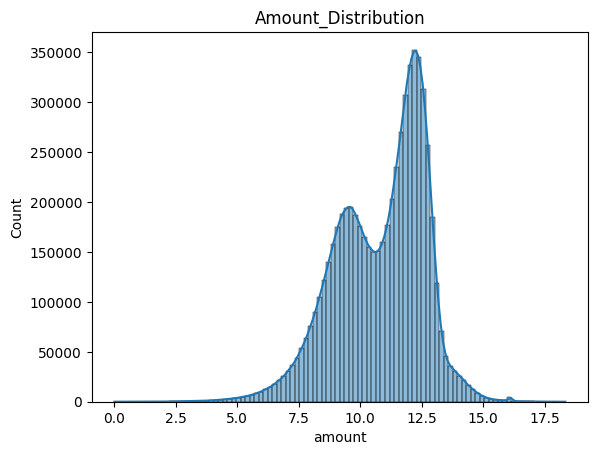

In [36]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True)
plt.title('Amount_Distribution')
plt.show()

In [41]:
df.groupby('step')['isFraud'].value_counts(normalize=True)

step  isFraud
1     0          0.994092
      1          0.005908
2     0          0.992110
      1          0.007890
3     0          0.992754
                   ...   
739   1          1.000000
740   1          1.000000
741   1          1.000000
742   1          1.000000
743   1          1.000000
Name: proportion, Length: 1164, dtype: float64

In [5]:
df.drop('step', inplace=True, axis=1)

In [6]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
fraud_type = df[df["type"].isin(['TRANSFER', 'CASH_OUT'])]

In [54]:
fraud_type['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

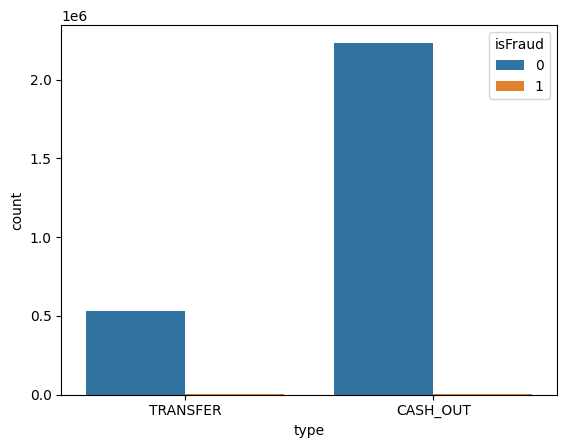

In [55]:
sns.countplot(fraud_type, x='type', hue='isFraud')

In [7]:
corr= df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [85]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [76]:
fraud_type.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


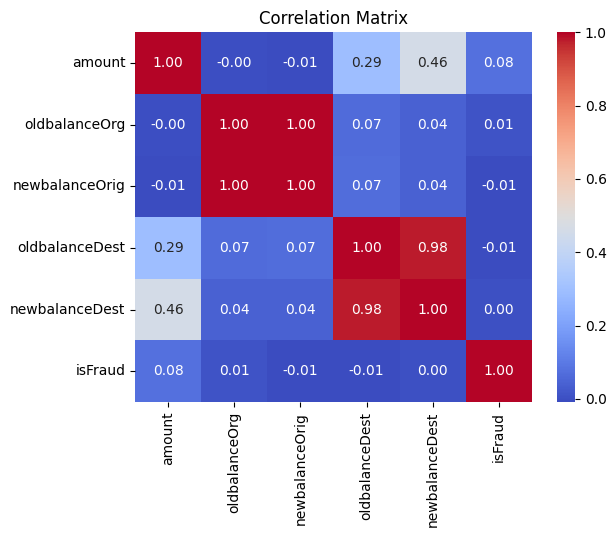

In [86]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

In [9]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#MODEL (LOGISTIC REGRESSION)

In [10]:
df_model=df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [11]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [12]:
numerical = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
categorical = ['type']

In [13]:
X = df_model.drop("isFraud", axis=1)
y = df_model['isFraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop='first'), categorical),
    ],
    remainder="drop"
)



In [16]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf',LogisticRegression(max_iter=1000,class_weight="balanced"))
])

In [17]:
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
y_pred = pipeline.predict(X_test)

In [35]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [26]:
auc = roc_auc_score(y_test, y_pred)

In [27]:
auc

0.9405611583832262

In [144]:
import joblib

In [147]:
joblib.dump(pipeline,"Fraud_Detection_Model.pkl")

['Fraud_Detection_Model.pkl']

In [2]:
%pip install streamlit
import streamlit as st

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.0 MB 4.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.0 MB 7.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.0 MB 8.5 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/9.0 MB 8.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/9.0 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 7.6/9.0 MB 6.4 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/9.0 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 9.0/9.0 MB 5.5 MB/s  0:00:01
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ---------------------------------------- 795.4/795.4 kB 3.1 MB/s  0:00:00
   ---------------------

In [3]:
import streamlit as st

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


ValueError: could not convert string to float: 'TRANSFER'